In [1]:
import zipfile as zp
import pandas as pd
import numpy as np
# from pypac import PACSession as Session #or use requests below if non-ONS
#from requests import Session
from io import BytesIO
import os
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import LoadData as dataLoader
%matplotlib notebook

###  Read in files


In [ ]:
# Path to zip files
path = "/Users/lb8075/Loneliness_Data_challenge/Loneliness_notebook/Data/"

In [ ]:
print (path[:-5])
print (path[:-25])

First lets load all the data... do this just once!

In [2]:
proc_data, proc_data_dict =dataLoader.loadFinalData('../Loneliness')
codes=dataLoader.loadProccessedData('../Loneliness')
drugs_list = dataLoader.loadDrugsList('../Loneliness')
msoa_data, msoa_data_dict = dataLoader.loadmsoaData('../Loneliness')

In [13]:
mData = dataLoader.mergedDataStreams(proc_data,codes)
mData.reset_index(drop=False, inplace=True)
mData.groupby(['PCT','Postcode','Year']).aggregate(np.mean)[['NUMBER_OF_PATIENTS','loneliness_zscore']].head(10)

NUMBER_OF_PATIENTS  loneliness_zscore
PCT Postcode Year                                       
00C DL1 3RT  2016         3842.750000           0.343652
             2017         9748.166667           0.359031
             2018        11859.166667           0.356975
    DL1 3RT  2016         3842.750000           0.343652
             2017         9748.166667           0.359031
             2018        11859.166667           0.356975
    DL1 4YL  2016         3800.250000           0.127629
             2017         9356.750000           0.176034
             2018        11353.000000           0.426079
    DL1 4YL  2016         3800.250000           0.127629

In [12]:
# playing around with apply and grouping
def getLonelinessScore(x) : 
    return pd.DataFrame(dict(Loneliness=list(x['loneliness_zscore'].unique())))

df = mergedData.groupby(['PCT','pcstrip','SHA','Postcode','Date'])#.apply(getLonelinessScore)
#df.reset_index(drop=False, inplace=True)
#df = df[['PCT','pcstrip','Postcode','Date','Loneliness']]
#df.head(10)

In [36]:
import seaborn as sns

agg = mData.groupby(['PCT','pcstrip','SHA','Postcode','Year']).aggregate(np.mean)
# now lets see ones that are 3 sigma away from the mean 
meanScore = agg['loneliness_zscore'].mean()
stdScore = agg['loneliness_zscore'].std()
print('mean loneliness z score - %.1f, standard deviation %.1f'%(meanScore,stdScore))
agg.head(10)

mean loneliness z score - 0.2, standard deviation 0.9


index  NUMBER_OF_PATIENTS  oseast1m  \
PCT pcstrip SHA Postcode Year                                          
00C DL13RT  Q45 DL1 3RT  2016  39082.0         3842.750000  430807.0   
                         2017  39091.0         9748.166667  430807.0   
                         2018  39100.0        11859.166667  430807.0   
                DL1 3RT  2016  39080.5         3842.750000  430807.0   
                         2017  39089.5         9748.166667  430807.0   
                         2018  39098.5        11859.166667  430807.0   
    DL14YL  Q45 DL1 4YL  2016  39271.0         3800.250000  429705.0   
                         2017  39280.0         9356.750000  429705.0   
                         2018  39289.0        11353.000000  429705.0   
                DL1 4YL  2016  39269.5         3800.250000  429705.0   

                               osnrth1m    imd  depression_perc  \
PCT pcstrip SHA Postcode Year                                     
00C DL13RT  Q45 DL1 3RT  2016  516886.0   -7.0         6.583032   
                         2017  516886.0   -7.0         6.755881   
                         2018  516886.0   -7.0         7.143392   
                DL1 3RT  2016  516886.0   -7.0         6.583032   
                         2017  516886.0   -7.0         6.755881   
                         2018  516886.0   -7.0         7.143392   
    DL14YL  Q45 DL1 4YL  2016  513647.0  102.0         6.654558   
                         2017  513647.0  102.0         7.128796   
                         2018  513647.0  102.0         7.717482   
                DL1 4YL  2016  513647.0  102.0         6.654558   

                               alzheimers_perc  blood pressure_perc  \
PCT pcstrip SHA Postcode Year                                         
00C DL13RT  Q45 DL1 3RT  2016         0.384539             5.879630   
                         2017         0.379532             5.865795   
                         2018         0.317983             5.796574   
                DL1 3RT  2016         0.384539             5.879630   
                         2017         0.379532             5.865795   
                         2018         0.317983             5.796574   
    DL14YL  Q45 DL1 4YL  2016         0.464553             5.756630   
                         2017         0.411743             5.748601   
                         2018         0.416803             5.808538   
                DL1 4YL  2016         0.464553             5.756630   

                               hypertension_perc  diabetes_perc    ...     \
PCT pcstrip SHA Postcode Year                                      ...      
00C DL13RT  Q45 DL1 3RT  2016           6.540529       1.718681    ...      
                         2017           6.374987       1.787475    ...      
                         2018           6.292581       1.802910    ...      
                DL1 3RT  2016           6.540529       1.718681    ...      
                         2017           6.374987       1.787475    ...      
                         2018           6.292581       1.802910    ...      
    DL14YL  Q45 DL1 4YL  2016           6.991100       1.730108    ...      
                         2017           6.641870       1.662697    ...      
                         2018           6.433431       1.712899    ...      
                DL1 4YL  2016           6.991100       1.730108    ...      

                               alzheimers_zscore  blood pressure_zscore  \
PCT pcstrip SHA Postcode Year                                             
00C DL13RT  Q45 DL1 3RT  2016           1.049583              -0.773924   
                         2017           1.017908              -0.782235   
                         2018           0.628599              -0.823814   
                DL1 3RT  2016           1.049583              -0.773924   
                         2017           1.017908              -0.782235   
                         2018           0.628599            

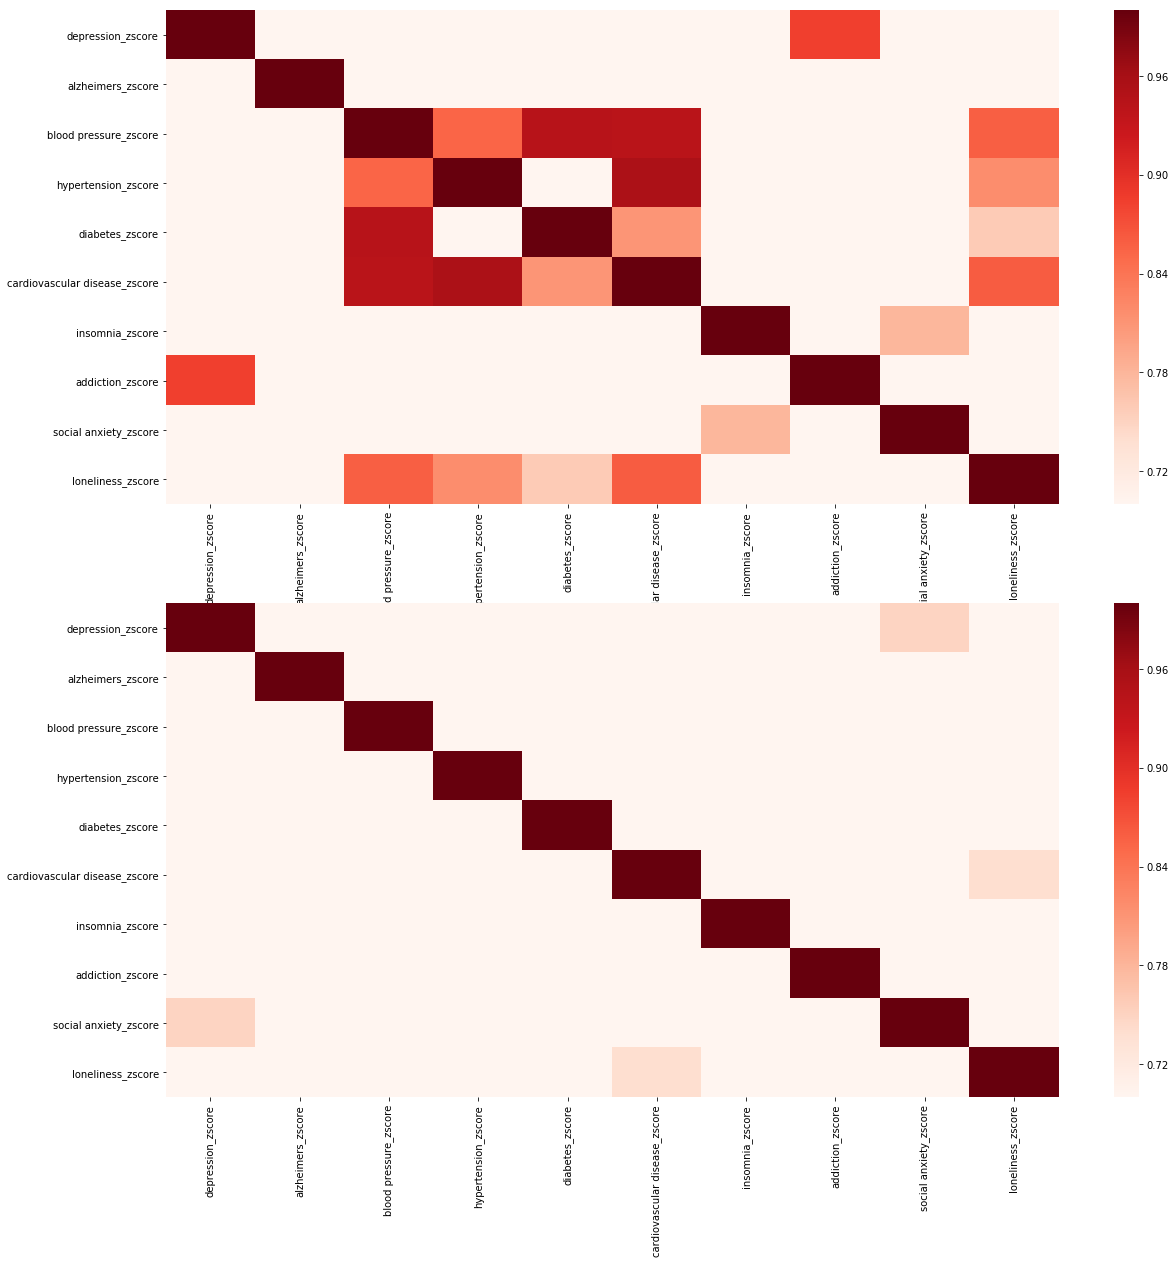

In [30]:
dfOutliers = agg.loc[ np.abs(agg['loneliness_zscore'] -meanScore) > 5*stdScore ]
#dfOutliers = dfOutliers.drop( ['Date','Month','Year','ITEMS'] , axis=1)
dfOutliers = dfOutliers[[s for s in dfOutliers.columns if "zscore"in s]]
dfNominal = agg.loc[ np.abs(agg['loneliness_zscore'] -meanScore) < 5*stdScore ]
dfNominal = dfNominal[[s for s in dfOutliers.columns if "zscore"in s]]
plt.figure(figsize=(20,20))
plt.subplot(2, 1, 1)
sns.heatmap(dfOutliers.corr(), vmin=0.7, vmax=1 , cmap='Reds')
plt.subplot(2, 1, 2)
sns.heatmap(dfNominal.corr(), vmin=0.7, vmax=1 , cmap='Reds')
plt.show()

Now cana also have a look at the geographic distribution of the data [this is awesome Lana!!]

In [38]:
geo_data = gpd.GeoDataFrame(mData, 
                            crs = {'init':'epsg:27700'}, 
                            geometry = mData.apply(lambda geom: Point(geom['oseast1m'],geom['osnrth1m']),axis=1))
geo_data.head(100)

,index,pcstrip,Year,NUMBER_OF_PATIENTS,SHA,PCT,oseast1m,osnrth1m,lsoa11,msoa11,...,hypertension_zscore,diabetes_zscore,cardiovascular disease_zscore,insomnia_zscore,addiction_zscore,social anxiety_zscore,loneliness_zscore,loneills,Postcode,geometry
0,0,AL100BS,2016,3171.916667,Q58,06K,522443,208996,E01023927,E02004990,...,-0.311210,-0.457039,-0.403666,-0.470144,-0.088685,-0.206785,-0.696324,-2.090846,AL10 0BS,POINT (522443 208996)
1,1,AL100BS,2016,3171.916667,Q58,06K,522443,208996,E01023927,E02004990,...,-0.311210,-0.457039,-0.403666,-0.470144,-0.088685,-0.206785,-0.696324,-2.090846,AL10 0BS,POINT (522443 208996)
2,2,AL100BS,2016,3171.916667,Q58,06K,522443,208996,E01023927,E02004990,...,-0.311210,-0.457039,-0.403666,-0.470144,-0.088685,-0.206785,-0.696324,-2.090846,AL10 0BS,POINT (522443 208996)
3,3,AL100BS,2016,3171.916667,Q58,06K,522443,208996,E01023927,E02004990,...,-0.311210,-0.457039,-0.403666,-0.470144,-0.088685,-0.206785,-0.696324,-2.090846,AL10 0BS,POINT (522443 208996)
4,4,AL100BS,2016,3171.916667,Q58,06K,522443,208996,E01023927,E02004990,...,-0.311210,-0.457039,-0.403666,-0.470144,-0.088685,-0.206785,-0.696324,-2.090846,AL10 0BS,POINT (522443 208996)
5,5,AL100BS,2016,3171.916667,Q58,06K,522443,208996,E01023927,E02004990,...,-0.311210,-0.457039,-0.403666,-0.470144,-0.088685,-0.206785,-0.696324,-2.090846,AL10 0BS,POINT (522443 208996)
6,6,AL100BS,2016,3171.916667,Q58,06K,522443,208996,E01023927,E02004990,...,-0.311210,-0.457039,-0.403666,-0.470144,-0.088685,-0.206785,-0.696324,-2.090846,AL10 0BS,POINT (522443 208996)
7,7,AL100BS,2016,3171.916667,Q58,06K,522443,208996,E01023927,E02004990,...,-0.311210,-0.457039,-0.403666,-0.470144,-0.088685,-0.206785,-0.696324,-2.090846,AL10 0BS,POINT (522443 208996)
8,8,AL100BS,2016,3171.916667,Q58,06K,522443,208996,E01023927,E02004990,...,-0.311210,-0.457039,-0.403666,-0.470144,-0.088685,-0.206785,-0.696324,-2.090846,AL10 0BS,POINT (522443 208996)
9,9,AL100BS,2017,7990.750000,Q58,06K,522443,208996,E01023927,E02004990,...,-0.262544,-0.275512,-0.192223,-0.434156,-0.086022,0.199294,-0.315757,-0.894752,AL10 0BS,POINT (522443 208996)


KeyError: 'Year'

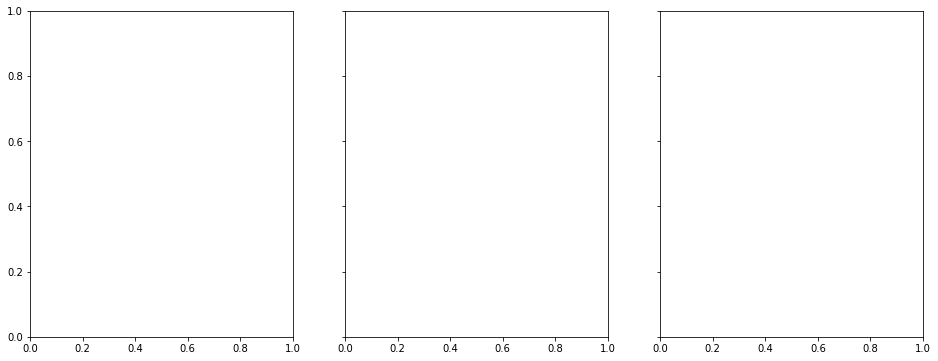

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,6), sharex = True, sharey = True)

geo_data[geo_data['Year'] == 2016].plot(column = 'loneills', scheme = 'quantiles', cmap = 'Reds', marker = '.', ax = ax1);
geo_data[geo_data['Year'] == 2017].plot(column = 'loneills', scheme = 'quantiles', cmap = 'Reds', marker = '.', ax = ax2);
geo_data[geo_data['Year'] == 2018].plot(column = 'loneills', scheme = 'quantiles', cmap = 'Reds', marker = '.', ax = ax3);